In [7]:
# Add my own libraries to the path
import sys
sys.path.append('/Users/Mead/Physics/library/python')

# Import libraries
import mead_cosmology as cosm
import numpy as np
import matplotlib.pyplot as plt

# Inline plots
%matplotlib inline

cosm.assign_cosmology()
cosm.initialise_cosmology()
cosm.print_cosmology()
cosm.initialise_distances()
cosm.initialise_growth()

Assign_cosmology: Setting cosmological parameters
Assign_cosmology: Done

Initialise_cosmology: min -> max in a_tab: 1e-05 -> 1.0
Initialise_cosmology: min -> max in a_logtab: 1e-05 -> 1.0
Initialise_cosmology: min -> max in a_lintab: 0.0 -> 1.0

Print_cosmology: Parameters
Print_cosmology: Om_r: 0.0
Print_cosmology: Om_m: 0.3
Print_cosmology: Om_v: 0.0
Print_cosmology: Om_w: 0.7
Print_cosmology: Om: 1.0
Print_cosmology: Dark energy: LCDM
Print_cosmology: Done

Initialise_distances: Horizon size [dimensionless]: 3.305075828454602
Initialise_distances: Horizon size [Mpc/h]: 9908.617333706896
Initialise_distances: Universe age [dimensionless]: 0.964099381639469
Initialise_distances: Universe age [Gyr/h]: 9.426963753670728
Initialise_distances: r(0): 3.3050758284546022
Initialise_distances: rp(0): 0.0
Initialise_distances: t(0): 0.0

Initialise_growth: Solving growth equations
Initialise_growth: ODE solved
Initialise_growth: Creating interpolators
Initialise_growth: Interpolators done
Ini

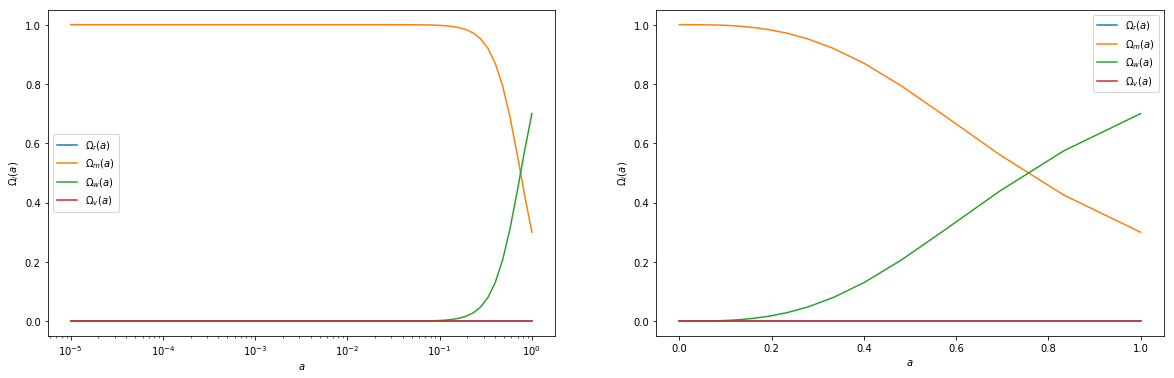

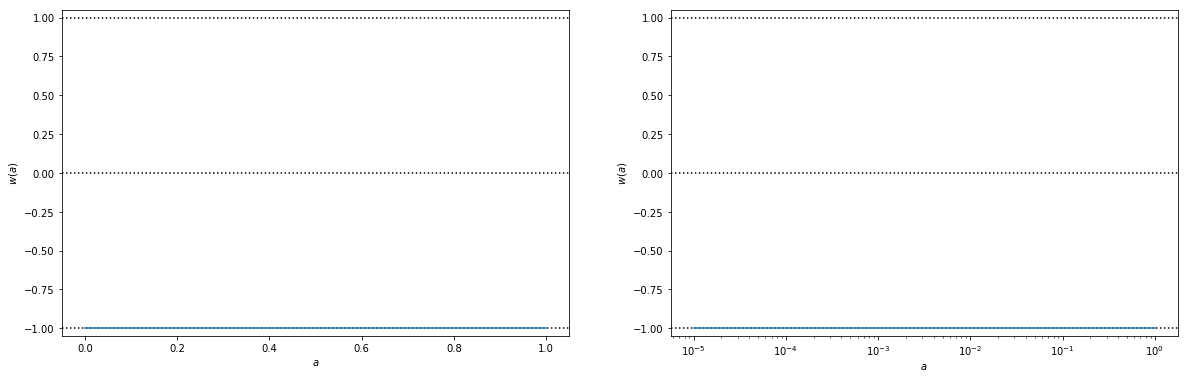

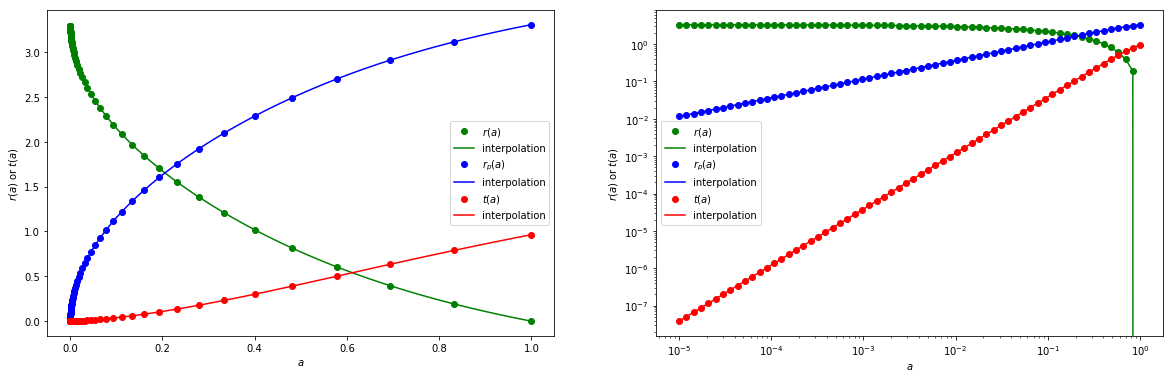

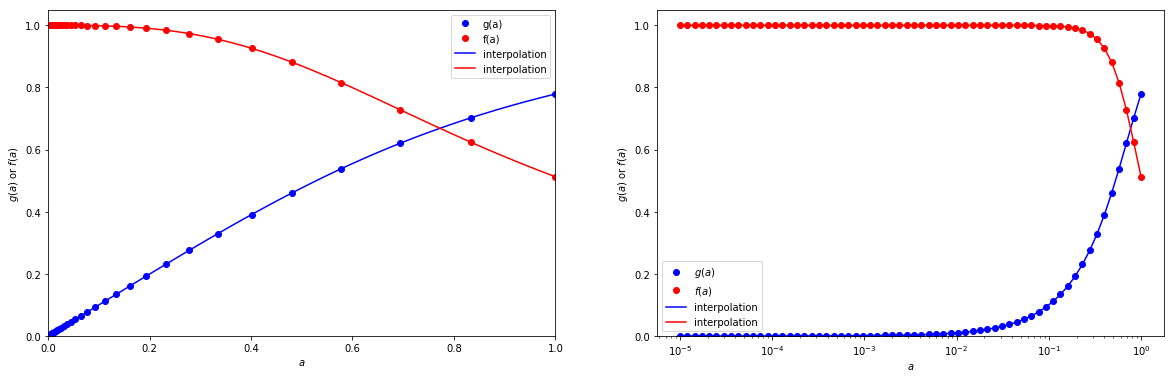

In [6]:
cosm.plot_omegas()
cosm.plot_distances()
cosm.plot_growth()

In [3]:
print('Om_m:', cosm.Om_m)
print('g(a=0.5)', cosm.g(0.5))
print()

Om_m: 0.3
g(a=0.5) 0.4765845568812729



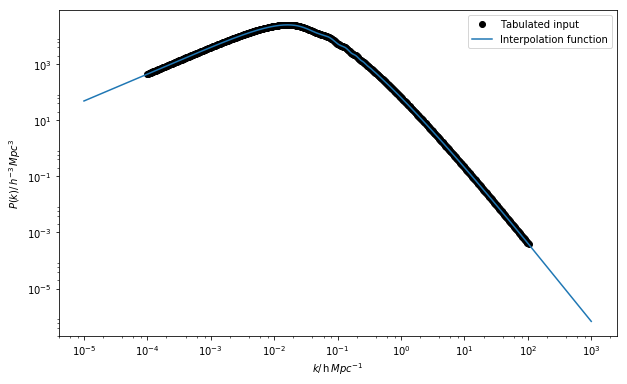

In [4]:
k_tab,Pk_tab = cosm.read_CAMB('data/CAMB_matterpower_z0.dat')

Pk = cosm.create_Pk(k_tab,Pk_tab)

#Set a k range for plot to check interpolation
kmin=1e-5
kmax=1e3
nk=1000
k=np.exp(np.linspace(np.log(kmin),np.log(kmax),nk))

#Plot the power spectrum
plt.figure(1,figsize=(10,6))
plt.loglog(k_tab,Pk_tab,'ko',label='Tabulated input')
plt.loglog(k,Pk(k),'-',label='Interpolation function')
#plt.loglog(k,Pk_HZ(k),'-',label='Harrizon-Zel''docvich')
plt.xlabel(r'$k /\,\mathrm{h}\,Mpc^{-1}$')
plt.ylabel(r'$P(k) /\,h^{-3}\,Mpc^3$')
plt.legend()
plt.show()